## EVCS Visualisation - Barcelona

#### In this analysis, we would like to explore the dataset of EVCS in Barcelona Spain by investigating various important features and visualising relevant results.

In [83]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime
from datetime import datetime as dt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [84]:
# Read CSV file of Spain charging station usage dataset
df = pd.read_csv("/Users/merry/Desktop/Barcelona-Spain.csv")
df.head()

,START TIME,STOP TIME,DURATION (min),CONSUMPTION (kWh),Charger,AvPower
0,31/12/2019,31/12/2019,24,10.7,Quick,26.750000
1,31/12/2019,31/12/2019,29,17.0,Quick,35.172414
2,31/12/2019,31/12/2019,18,5.2,Quick,17.333333
3,31/12/2019,31/12/2019,41,20.4,Quick,29.853659
4,31/12/2019,31/12/2019,7,1.7,Quick,14.571429


In [85]:
# Check if there's any null values
df.isnull().sum()

START TIME           0
STOP TIME            0
DURATION (min)       0
CONSUMPTION (kWh)    0
Charger              0
AvPower              0
dtype: int64

In [86]:
# Basic information of each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36413 entries, 0 to 36412
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   START TIME         36413 non-null  object 
 1   STOP TIME          36413 non-null  object 
 2   DURATION (min)     36413 non-null  int64  
 3   CONSUMPTION (kWh)  36413 non-null  float64
 4   Charger            36413 non-null  object 
 5   AvPower            36413 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.7+ MB


In [87]:
df.describe()

,DURATION (min),CONSUMPTION (kWh),AvPower
count,36413.000000,36413.000000,36413.000000
mean,45.780628,10.178133,21.305278
std,702.254458,8.038472,14.306915
min,5.000000,0.008000,0.000013
25%,19.000000,4.400000,12.000000
50%,27.000000,8.200000,20.800000
75%,38.000000,14.100000,31.200000
max,132938.000000,167.400000,913.090909


### Variables Exploration

#### Duration (min)

In [88]:
# Replace outliers with mean+3*std value
for i in range(len(df)):
    if df["DURATION (min)"].iloc[i] > df["DURATION (min)"].mean() + 3*df["DURATION (min)"].std():
        df["DURATION (min)"].iloc[i] = df["DURATION (min)"].mean() + 3*df["DURATION (min)"].std()

In [89]:
df["DURATION (min)"].describe()

count    36413.000000
mean        40.138399
std         70.349000
min          5.000000
25%         19.000000
50%         27.000000
75%         38.000000
max       2152.544001
Name: DURATION (min), dtype: float64

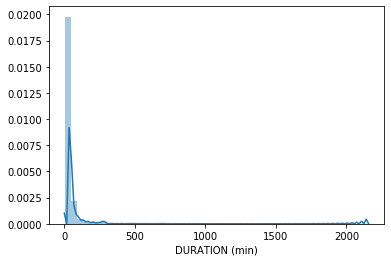

In [90]:
# Exploration on charge time as one of the research task
sns.distplot(df["DURATION (min)"])

Text(0.5, 0, 'DURATION (min)')

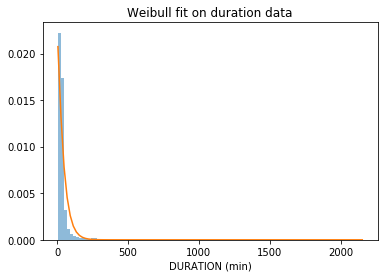

In [91]:
# Weibull Distribution
from scipy.stats import weibull_min 
plt.hist(df["DURATION (min)"], bins=100, density=True, alpha=0.5) 
shape, loc, scale = weibull_min.fit(df["DURATION (min)"], floc=0) 
x = np.linspace(df["DURATION (min)"].min(), df["DURATION (min)"].max(), 100) 
plt.plot(x, weibull_min(shape, loc, scale).pdf(x)) 
plt.title("Weibull fit on duration data") 
plt.xlabel("DURATION (min)")

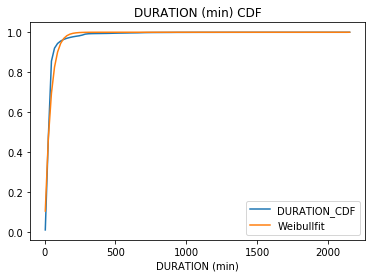

In [92]:
# CDF for Weibull Distribution
import statsmodels.distributions 
ecdf=statsmodels.distributions.ECDF(df["DURATION (min)"]) 
plt.plot(x,ecdf(x),label="DURATION_CDF") 
plt.plot(x,weibull_min(shape,loc,scale).cdf(x), label="Weibullfit")
plt.title("DURATION (min) CDF") 
plt.xlabel("DURATION (min)") 
plt.legend()

Text(0.5, 1.0, 'Weibull probability plot of Duration')

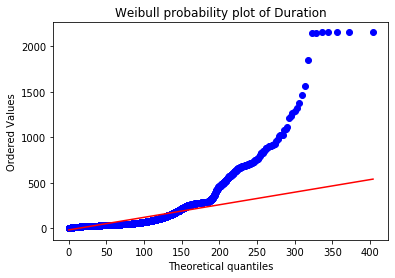

In [93]:
# Probility plot of Weibull
from scipy.stats import probplot, weibull_min 
probplot(df["DURATION (min)"], dist=weibull_min(shape,loc,scale), plot=plt.figure().add_subplot(111)) 
plt.title("Weibull probability plot of Duration")

In [94]:
# Percent-Point Function
import scipy.stats
scipy.stats.weibull_min(shape, loc, scale).ppf(0.8)

64.81460697510474

##### By the above Percent-Point Function, we can tell 80% of the charging events were no more than 64.81 minutes by fitting in Weibull Distribution.

Text(0.5, 1.0, 'Lognormal probability plot of duration (min)')

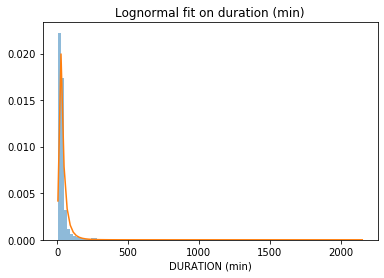

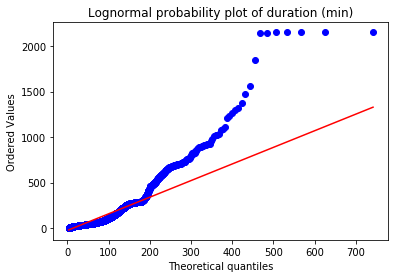

In [95]:
# Lognormal Distribution
shape,loc,scale=scipy.stats.lognorm.fit(df["DURATION (min)"]) 
fitted=scipy.stats.lognorm(shape,loc,scale) 
plt.hist(df["DURATION (min)"],bins=100,density=True,alpha=0.5) 
x=np.linspace(df["DURATION (min)"].min(),df["DURATION (min)"].max(),100) 
plt.plot(x,fitted.pdf(x)) 
plt.title("Lognormal fit on duration (min)") 
plt.xlabel("DURATION (min)") 
scipy.stats.probplot(df["DURATION (min)"],dist=fitted, plot=plt.figure().add_subplot(111)) 
plt.title("Lognormal probability plot of duration (min)")

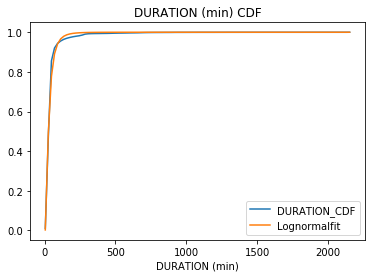

In [96]:
# CDF for Lognormal Distribution
ecdf=statsmodels.distributions.ECDF(df["DURATION (min)"]) 
plt.plot(x,ecdf(x),label="DURATION_CDF") 
plt.plot(x,scipy.stats.lognorm(shape,loc,scale).cdf(x), label="Lognormalfit")
plt.title("DURATION (min) CDF") 
plt.xlabel("DURATION (min)") 
plt.legend()

In [97]:
# Percent-Point Function
scipy.stats.lognorm(shape,loc,scale).ppf(0.8)

51.405882045125004

##### By fitting in lognormal distribution, we would conclude 80% of charging time was less or equal to 51.41 minutes. 
##### With the results we generated above, we know 80% of users would charge their vehicles within 1 hour at EVCSs.

#### Charger Type

In [98]:
# Charging event count
df["Charger"].value_counts()

Quick     33158
Normal     3255
Name: Charger, dtype: int64

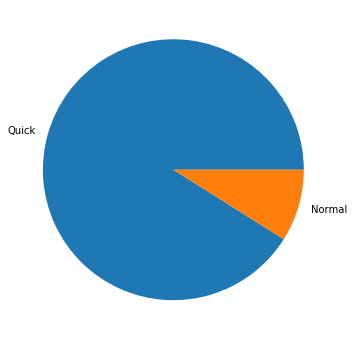

In [99]:
# Plot Pie Chart of Charger Type
fig = plt.figure(figsize =(6, 6))
plt.pie(df["Charger"].value_counts(), labels = df["Charger"].value_counts().index)
 
# show plot
plt.show()

##### More users were using Quick chargers than Normal ones. According to our investigation of EVCSs in Barcelona, most stations provide both Quick and Normal chargers. However, we currently have no data about how many of each charger type are facilitated in each EVCS. We may assume users would prefer use quick chargers than normal ones by the above result.

#### Consumption (kWh)

In [100]:
# Replace outliers with 100
for i in range(len(df)):
    if df["CONSUMPTION (kWh)"].iloc[i] > 100:
        df["CONSUMPTION (kWh)"].iloc[i] = 100

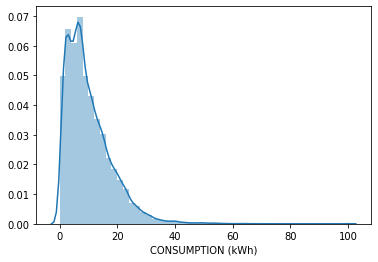

In [101]:
# Histogram of Total Energy consumed
sns.distplot(df["CONSUMPTION (kWh)"])

In [102]:
df["CONSUMPTION (kWh)"].describe()

count    36413.000000
mean        10.174294
std          7.984238
min          0.008000
25%          4.400000
50%          8.200000
75%         14.100000
max        100.000000
Name: CONSUMPTION (kWh), dtype: float64

Text(0.5, 1.0, 'Lognormal probability plot of CONSUMPTION (kWh)')

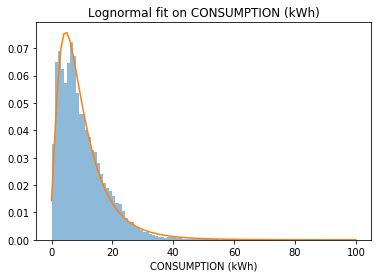

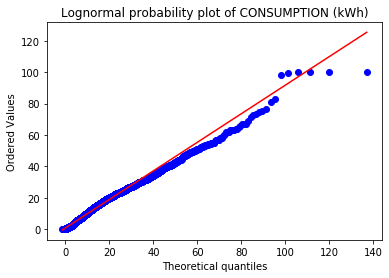

In [103]:
# Lognormal Distribution
shape,loc,scale=scipy.stats.lognorm.fit(df["CONSUMPTION (kWh)"]) 
fitted=scipy.stats.lognorm(shape,loc,scale) 
plt.hist(df["CONSUMPTION (kWh)"],bins=100,density=True,alpha=0.5) 
x=np.linspace(df["CONSUMPTION (kWh)"].min(),df["CONSUMPTION (kWh)"].max(),100) 
plt.plot(x,fitted.pdf(x)) 
plt.title("Lognormal fit on CONSUMPTION (kWh)") 
plt.xlabel("CONSUMPTION (kWh)") 
scipy.stats.probplot(df["CONSUMPTION (kWh)"],dist=fitted, plot=plt.figure().add_subplot(111)) 
plt.title("Lognormal probability plot of CONSUMPTION (kWh)")

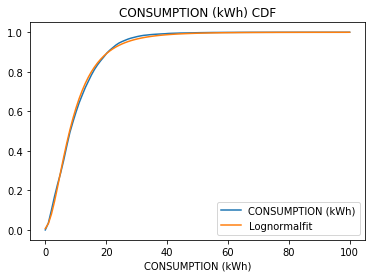

In [104]:
ecdf=statsmodels.distributions.ECDF(df["CONSUMPTION (kWh)"]) 
plt.plot(x,ecdf(x),label="CONSUMPTION (kWh)") 
plt.plot(x,scipy.stats.lognorm(shape,loc,scale).cdf(x), label="Lognormalfit")
plt.title("CONSUMPTION (kWh) CDF") 
plt.xlabel("CONSUMPTION (kWh)") 
plt.legend()

In [109]:
# Percent-Point Function
scipy.stats.lognorm(shape,loc,scale).ppf(0.8)

15.156253090276623

##### Above PPF suggests that 80% of charging events consumed equal or less than 15.16 kWh by fitting in lognormal distribution.

#### AvPower

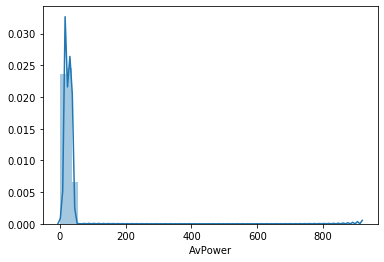

In [105]:
# Histogram of Total Energy consumed
sns.distplot(df["AvPower"])

In [106]:
df["AvPower"].describe()

count    36413.000000
mean        21.305278
std         14.306915
min          0.000013
25%         12.000000
50%         20.800000
75%         31.200000
max        913.090909
Name: AvPower, dtype: float64

##### The AvPower is right skewed with mean of 21.30 w, which lies in the range of 0 w and 913.09 w.

#### Relationship between Duration and Consumption

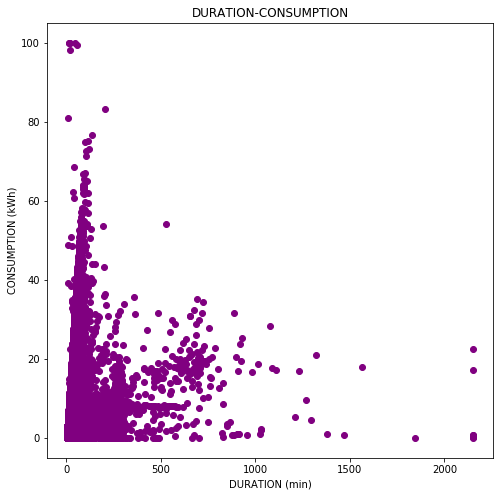

In [107]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(8, 8))

# Add x-axis and y-axis
ax.scatter(df['DURATION (min)'].values,
           df['CONSUMPTION (kWh)'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="DURATION (min)",
       ylabel="CONSUMPTION (kWh)",
       title="DURATION-CONSUMPTION")

plt.show()

##### The above scatter plot indicates we may identify linear relationship between Duration and Consumption.

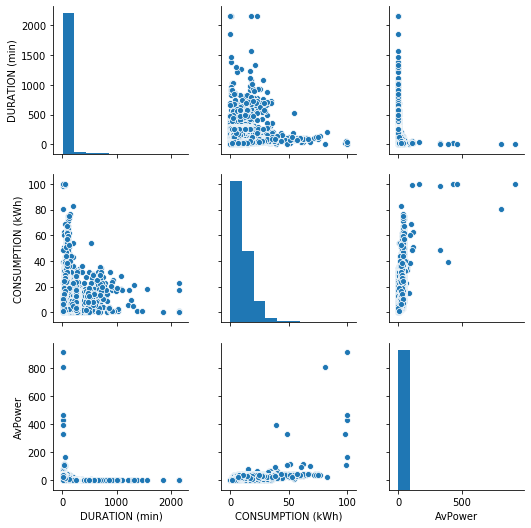

In [108]:
sns.pairplot(df)

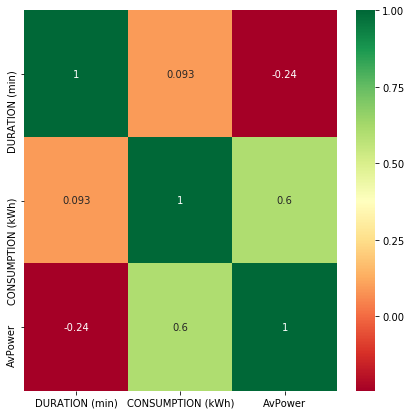

In [110]:
# Check the Pearson correlation between different features
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (7, 7))
hm = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

##### The above pairplot and correlation coefficients reveal a moderate linear relationship between Consumption and AvPower, and a week negative linear relationship between Duration and AvPower. 